
# BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021

## Session 9: Decision Trees


In this notebook, we continue with our discussion on supervised learning approaches and describe tree-based methods for classification and regression. <br>
The book ["An Introduction to Statistical Learning"](http://www-bcf.usc.edu/~gareth/ISL/) (chapter 8 on decision trees) has good reference material on the topics we discuss today. Also, the chapter 6 and chapter 7 of the book [Hands on Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291) are helpful too.

### Verify New Package Installation

<div class="alert alert-block alert-info">
    
<mark><b><u>Windows Users</u></b></mark>: <font color='black'>Go to <u>Anaconda prompt</u> (use the Windows search to locate it), run the following command, and follow any instructions on screen:</font><br>`conda install python-graphviz`
    
<br>
    
<mark><b><u>Mac Users</u></b></mark>: <br><font color='black'> (1) Follow the instructions given [here](http://macappstore.org/graphviz-2/). <font color='red'>If the command in step 3 gives an error, try the command ></font> `brew install graphviz`.<br> (2) Go to <u>Terminal</u>, run the following command, and follow any instructions on screen:</font> <br>`pip install graphviz`

<br>
<font color='black'>Once the above installation is complete, run this notebook (Click on <b>Cell-->Run All</b> in the main menu) and see whether it runs with no errors and produces colorful decision tree graphs</font>.
    
</div>

In [9]:
import pandas as pd
import numpy as np
import graphviz
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
pd.set_option('display.notebook_repr_html', True)

In [10]:
def print_tree(d_tree, f_names, c_names=None):
    dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=f_names, class_names=c_names, 
                                    filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 


## Decision Trees
`Decision Trees` are versatile machine learning (ML) algorithms that can be used for both classification and regression tasks and are capable of fitting complex datasets. Also, they are the fundamental component of `Random Forests`, which are among the most powerful ML algorithms available today.

Decision Trees:
 - are simple to understand and to interpret. Trees can be visualized
 - requires little data preparation
 - can handle multi-output problems
 - may create over-complex trees that do not generalise the data well
 - can be unstable because small variations in the data might result in a completely different tree being generated

### Classification Trees
Classification trees employ decision trees to address classification problems.<br> `Scikit-Learn` uses the `CART (Classification and Regression Tree)` algorithm to produce decision trees, using `recursive binary splitting`. 
Let's use the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) to learn the basic concepts of Decision Trees.

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
type(iris)



sklearn.utils.Bunch

In [5]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
X = iris.data[:,2:] # petal length and width
y = iris.target

In [7]:
# build decision tree
tree_clf = tree.DecisionTreeClassifier(max_depth=2,random_state=23)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=23)

In [8]:
# print the decision tree using GraphViz
graph = print_tree(d_tree=tree_clf, f_names=iris.feature_names[2:], c_names=iris.target_names)
graph

NameError: name 'print_tree' is not defined

In [8]:
# write the imge to a PNG file
with open('iris.png','wb') as f:
    f.write(graph.pipe(format='png'))

A node's `gini` attribute measures its impurity: a node is **pure** (`gini=0`) if all training instances it applies to belong to the same class. For example, the `depth-1` left node applies to only `Iris-Setosa` training instances, hence it is pure and its gini score is 0.<br>
Gini impurity is given by: 
<br> $${G}_i = 1 - \sum_{k=1}^{n} {{p_i}_k}^2 $$<br>
where ${p_i}_k$ is the ratio of class `k` instances among the training instances in the $i^{th}$ node.

Let's calculate the `gini score` of the `depth-2` left node.

In [9]:
1 - (49/54)**2 - (5/54)**2

0.1680384087791495

#### Estimating Class Probabilities
For  a classification tree, a given observation is predicted to be in the *most commonly occuring class* of training observations in the region to which it belongs. 

In [10]:
tree_clf.predict_proba([[5,1.5]]) # petal length: 5cm, petal width:1.5 cm

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5,1.5]])

array([1])

#### Other Impurity Measures
Another measure of node impurity is `entropy`. A node's entropy is `0` if it contains instances of only one class. 
The entropy of the $i^{th}$ node is given by:
$${H}_i = - \sum_{k=1}^{n} {p_i}_k log({p_i}_k) $$ where ${p_i}_k$ is the ratio of class `k` instances among the training instances in the $i^{th}$ node and ${p_i}_k\neq0$.

#### <mark> Exercise </mark>
- Generate a new decision tree using `entropy` as the measure of impurity. You need to set the `criterion` parameter equal to `entropy` when calling the `DecisionTreeClassifier`. <br>Visualize the decision tree and compare it to the tree generated with `gini` score.<br>
- Using the given formula, calculate the `entropy` of the `depth-2` left node (Use `np.log2` to get the logarithm).<br>

In [13]:
tree_clf = tree.DecisionTreeClassifier(max_depth=2,random_state=23, criterion = 'entropy')
tree_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=23)

In [3]:
graph = print_tree(d_tree=tree_clf, f_names=iris.feature_names[2:], c_names=iris.target_names)
graph

NameError: name 'print_tree' is not defined

In [16]:
-(49/54)*np.log2(49/54)-(5/54)*np.log2(5/54)

0.44506485705083865

### Heart Disease Dataset

Let's do another example using the heart disease dataset, `Heart.csv`.

In [17]:
heart = pd.read_csv('Heart.csv').drop('Unnamed: 0', axis=1).dropna()
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [18]:
print(heart['ChestPain'].unique())
print(heart['Thal'].unique())
print(heart['AHD'].unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable']
['No' 'Yes']


In [19]:
heart.shape

(297, 14)

In [20]:
heart = pd.get_dummies(heart, drop_first=True)
heart.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [21]:
heart.shape

(297, 17)

In [22]:
# prepare data for decision tree classifier
X1 = heart.drop('AHD_Yes', axis=1) 
y1 = heart.AHD_Yes

X1.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0


In [23]:
#split to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [24]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('X_val Shape:',X_val.shape)
print('')
print('Y_train Shape:',y_train.shape)
print('Y_test Shape:',y_test.shape)
print('Y_val Shape:',y_val.shape)

X_train Shape: (201, 16)
X_test Shape: (45, 16)
X_val Shape: (51, 16)

Y_train Shape: (201,)
Y_test Shape: (45,)
Y_val Shape: (51,)


In [1]:
# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clftree = DecisionTreeClassifier(max_leaf_nodes=6, max_features=3, random_state=23)
clftree.fit(X_train,y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [2]:
# plot the tree
graphClf = print_tree(d_tree=clftree, f_names=X1.columns, c_names=['No', 'Yes'])
graphClf

NameError: name 'print_tree' is not defined

In [27]:
# Validation Set Performance Evaluation for clftree model
print("Validation Set Classification Accuracy:", clftree.score(X_val,y_val))

# confusion matrix
print("Confusion Matrix:")
cm = pd.DataFrame(confusion_matrix(y_val, clftree.predict(X_val)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
display(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, clftree.predict(X_val)))

Validation Set Classification Accuracy: 0.8235294117647058
Confusion Matrix:


Predicted,No,Yes
Actual,,
No,24,1
Yes,8,18


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        25
           1       0.95      0.69      0.80        26

    accuracy                           0.82        51
   macro avg       0.85      0.83      0.82        51
weighted avg       0.85      0.82      0.82        51



In [28]:
#create a new decision trree model tuning the parameters
clftree_2 = DecisionTreeClassifier(max_leaf_nodes=3, max_features=10, random_state=23)
clftree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_features=10, max_leaf_nodes=3, random_state=23)

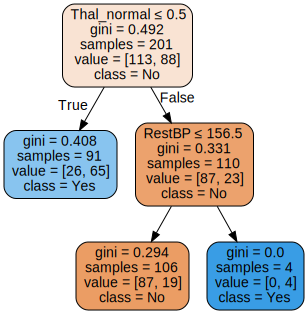

In [29]:
graphClf_2 = print_tree(d_tree=clftree_2, f_names=X1.columns, c_names=['No', 'Yes'])
graphClf_2

In [30]:
# Validation Set Performance Evaluation for clftree_2 model
print("Validation Set Classification Accuracy:", clftree_2.score(X_val,y_val))

# confusion matrix
print("Confusion Matrix:")
cm_2 = pd.DataFrame(confusion_matrix(y_val, clftree_2.predict(X_val)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm_2.index.name = 'Actual'
cm_2.columns.name = 'Predicted'
display(cm_2)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, clftree_2.predict(X_val)))

Validation Set Classification Accuracy: 0.7647058823529411
Confusion Matrix:


Predicted,No,Yes
Actual,,
No,20,5
Yes,7,19


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.79      0.73      0.76        26

    accuracy                           0.76        51
   macro avg       0.77      0.77      0.76        51
weighted avg       0.77      0.76      0.76        51



`clftree` seems to be the better model out of the two models created. Let's evaluate the performance of this model on the test set.

In [31]:
# Test Set Accuracy for the best model
print("Test Set Classification Accuracy:", clftree.score(X_test,y_test))

# confusion matrix
print("Confusion Matrix:")
cm_final = pd.DataFrame(confusion_matrix(y_test, clftree.predict(X_test)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm_final.index.name = 'Actual'
cm_final.columns.name = 'Predicted'
display(cm_final)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, clftree.predict(X_test)))

Test Set Classification Accuracy: 0.7333333333333333
Confusion Matrix:


Predicted,No,Yes
Actual,,
No,19,3
Yes,9,14


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        22
           1       0.82      0.61      0.70        23

    accuracy                           0.73        45
   macro avg       0.75      0.74      0.73        45
weighted avg       0.75      0.73      0.73        45



### Regression Trees
Decision Trees are also capable of performing regression tasks. <br>We can use Scikit-Learn's `DecisionTreeRegressor` to produce regression trees.

### Hitters Dataset
We use the **Hitters.csv** for our discussion on Regression Trees.

In [32]:
hitters = pd.read_csv('Hitters.csv').drop('Unnamed: 0', axis=1).dropna()
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [33]:
print(hitters.League.unique())
print(hitters.Division.unique())
print(hitters.NewLeague.unique())

['N' 'A']
['W' 'E']
['N' 'A']


In [34]:
hitters = pd.get_dummies(hitters, drop_first=True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


Let's predict a baseball player's salary based on `Years` (the number of years that he has played in the major leagues) and `Hits` (the number of hits that he made in the previous year).

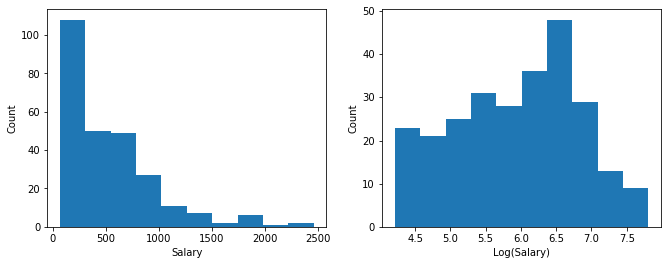

In [35]:
X2 = hitters[['Years', 'Hits']].to_numpy()
y2 = np.log(hitters.Salary.to_numpy()) # log transformation

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))

ax1.hist(hitters.Salary.to_numpy())
ax1.set_xlabel('Salary')
ax1.set_ylabel('Count')

ax2.hist(y2)
ax2.set_xlabel('Log(Salary)')
ax2.set_ylabel('Count');

In [36]:
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
regtree = DecisionTreeRegressor(max_leaf_nodes=3, random_state=23)
regtree.fit(X2, y2)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=23)

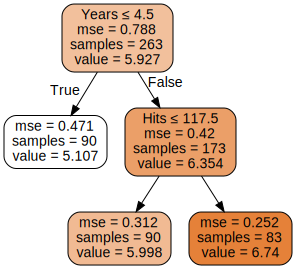

In [37]:
graphRegTree = print_tree(d_tree=regtree, f_names=['Years', 'Hits'])
graphRegTree

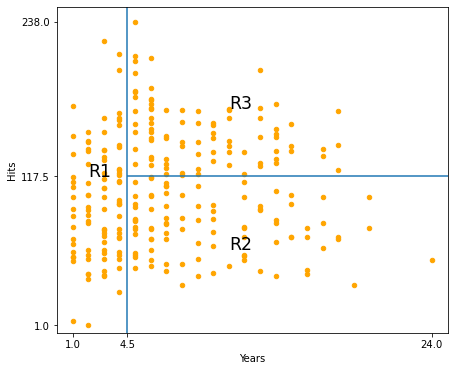

In [38]:
# we can plot the decision tree regions on the data
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

In [39]:
hitters_X = hitters.drop('Salary', axis=1) 
hitters_X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [40]:
# Training Test Split
X2 = hitters_X.to_numpy()
y2 = np.log(hitters.Salary.to_numpy())
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.5, random_state=23)

In [41]:
regtree2 = DecisionTreeRegressor(max_depth=3, random_state=23)
regtree2.fit(X2_train, y2_train)
pred = regtree2.predict(X2_test)

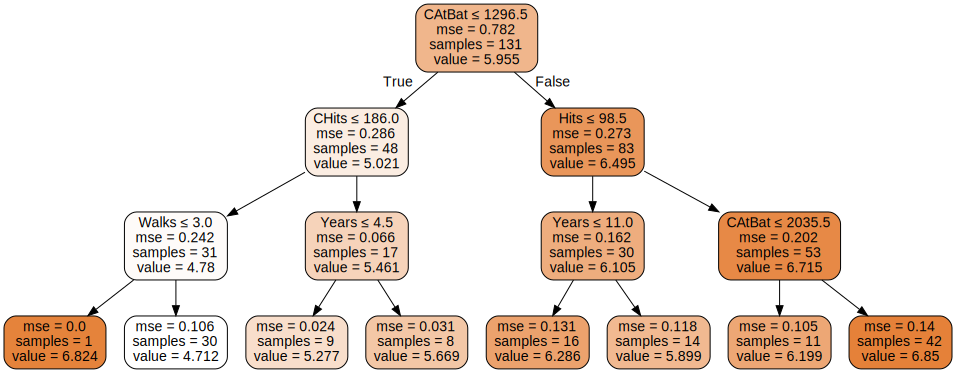

In [42]:
graph2 = print_tree(d_tree=regtree2, f_names=hitters_X.columns)
graph2

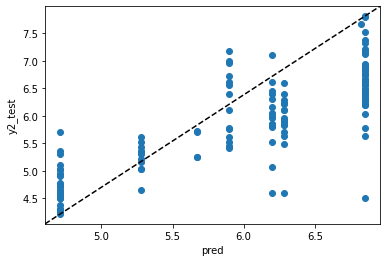

In [43]:
# Plotting predicted vs. actual
plt.scatter(pred, y2_test, label='Salary')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y2_test');

In [44]:
mean_squared_error(y2_test, pred)

0.2943865345410309

### Bagging and Random Forest

The decision trees we discussed suffer from high variance. <br>

**Bagging**: Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method.

Averaging a set of observations reduces variance. Hence a natural way to reduce the variance and hence increase the prediction accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions.

In the classification situation, there are a few possible approaches, but the simplest is as follows. For a given test observation, we can record the class predicted by each of the trees, and take a majority vote: the overall prediction is the most commonly occurring majority vote class among the predictions.

**Random Forest**: As in bagging, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, only a random sample of predictors is chosen as split candidates from the full set of predictors.

In [45]:
#checking the number of features available in the dataset (which is 19)
hitters_X.shape

(263, 19)

In [46]:
# Bagging: that is, we use all features in the dataset
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regtreeBag = RandomForestRegressor(max_features=19, random_state=23)
regtreeBag.fit(X2_train, y2_train)

RandomForestRegressor(max_features=19, random_state=23)

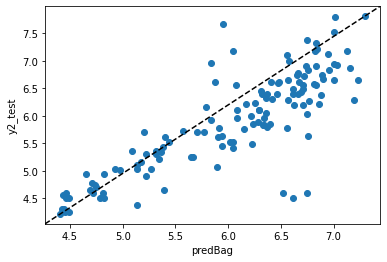

In [47]:
predBag = regtreeBag.predict(X2_test)
plt.scatter(predBag, y2_test, label='Salary')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('predBag')
plt.ylabel('y2_test');

In [48]:
mean_squared_error(y2_test, predBag)

0.26306789183954415

In [49]:
# Random forests: using 6 features
regtreeRF = RandomForestRegressor(max_features=6, random_state=23)
regtreeRF.fit(X2_train, y2_train)

RandomForestRegressor(max_features=6, random_state=23)

Text(0, 0.5, 'y2_test')

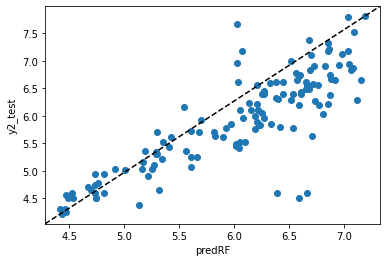

In [50]:
predRF = regtreeRF.predict(X2_test)
plt.scatter(predRF, y2_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('predRF')
plt.ylabel('y2_test')

In [51]:
mean_squared_error(y2_test, predRF)

0.2369609345421293

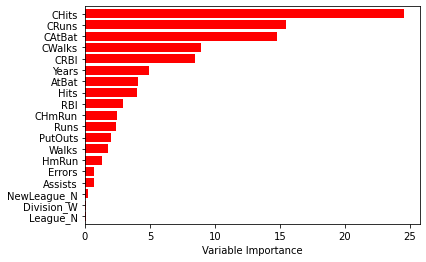

In [52]:
Importance = pd.DataFrame({'Importance':regtreeRF.feature_importances_*100}, index=hitters_X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', width = 0.8)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### Boosting
A key diﬀerence between boosting and random forests: in boosting, the growth of a particular tree takes into account the other trees that have already been grown. This often results in using smaller trees, which aids interpretability of the model.

In [53]:
# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
regtreeBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23)
regtreeBoost.fit(X2_train, y2_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=23)

Text(0, 0.5, 'y2_test')

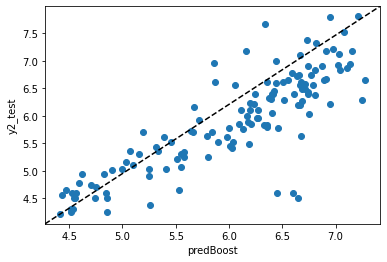

In [54]:
predBoost = regtreeBoost.predict(X2_test)
plt.scatter(predBoost, y2_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('predBoost')
plt.ylabel('y2_test')

In [55]:
mean_squared_error(y2_test, predBoost)

0.24953904025843532

Division_W      0.010906
League_N        0.293522
Errors          0.314131
Assists         0.366271
NewLeague_N     0.368513
CHmRun          0.816976
HmRun           1.012456
PutOuts         1.422836
Walks           1.631597
RBI             1.658218
Runs            2.101176
CWalks          3.156785
CRBI            3.389011
AtBat           3.470921
Hits            3.936483
CRuns           4.674161
Years           5.092976
CHits          12.999224
CAtBat         53.283839
dtype: float64


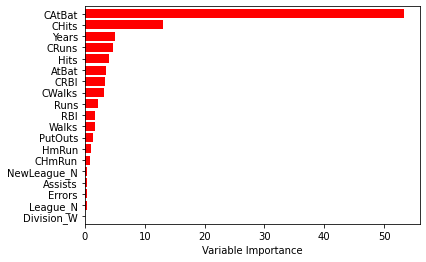

In [56]:
feature_importance = regtreeBoost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=hitters_X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', width=0.8)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### Practice Exercise

Use sklearn's `load_wine()` function to obtain the wine dataset. Train a Decision Tree classifier (tune it as appropriate) to predict the class of a given wine.